In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', None)

# Load the data


In [3]:
df = pd.read_csv('/kaggle/input/uspollution/pollution_us_2000_2016.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,10,27,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


# Set index as datetime 


In [4]:
df = df.set_index('Date Local')
df.index = pd.to_datetime(df.index)

# Aggregate data

In [5]:
# Aggregate data to have a unique daily index 
# Group by the date and calculate the mean for all numeric columns
df_agg = df.groupby(df.index).mean(numeric_only=True)


# exploratory data analysis

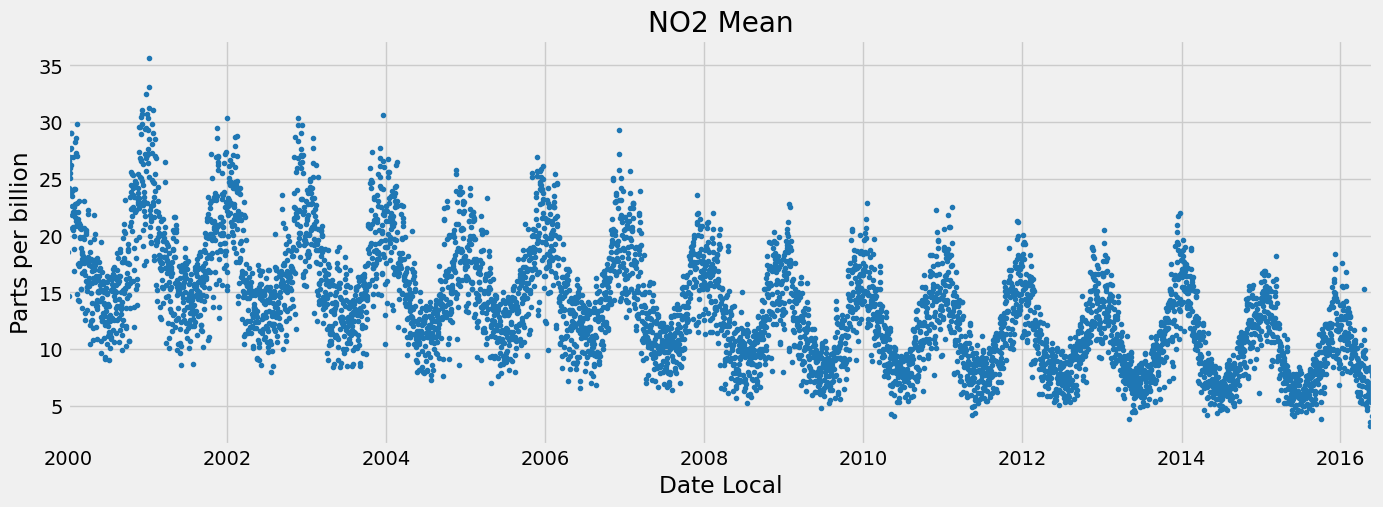

In [6]:
df_agg["NO2 Mean"].plot(style='.', 
                    figsize=(15,5), 
                    color="tab:blue", 
                    title="NO2 Mean")
plt.ylabel("Parts per billion")
plt.show()

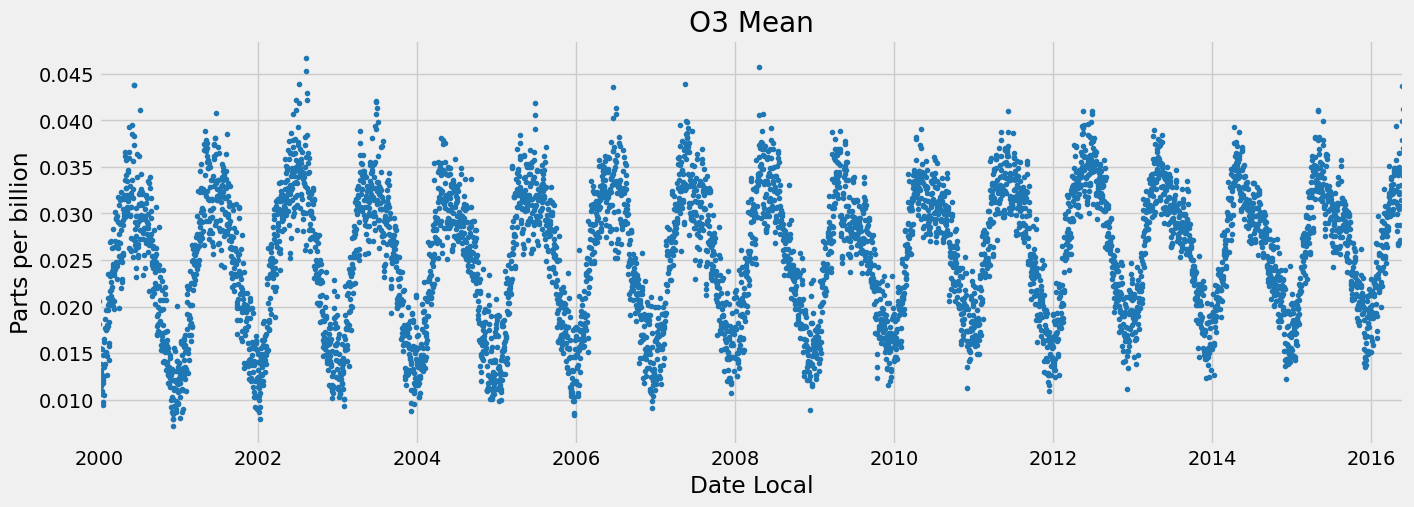

In [7]:
df_agg["O3 Mean"].plot(style='.', 
                    figsize=(15,5), 
                    color="tab:blue", 
                    title="O3 Mean")
plt.ylabel("Parts per billion")
plt.show()

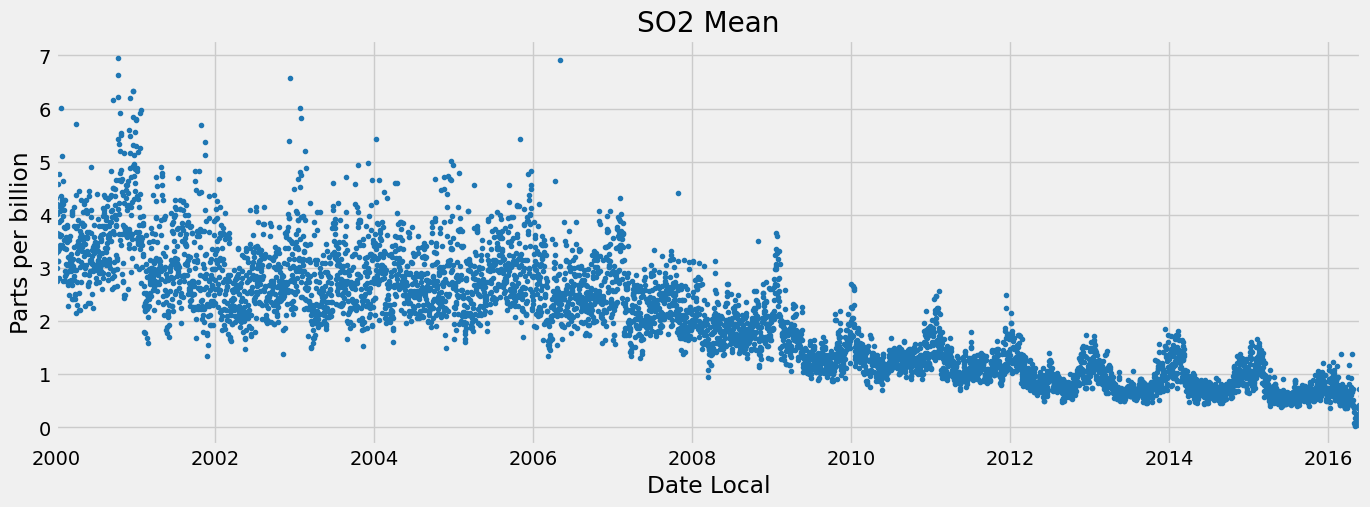

In [8]:
df_agg["SO2 Mean"].plot(style='.', 
                    figsize=(15,5), 
                    color="tab:blue", 
                    title="SO2 Mean")
plt.ylabel("Parts per billion")
plt.show()

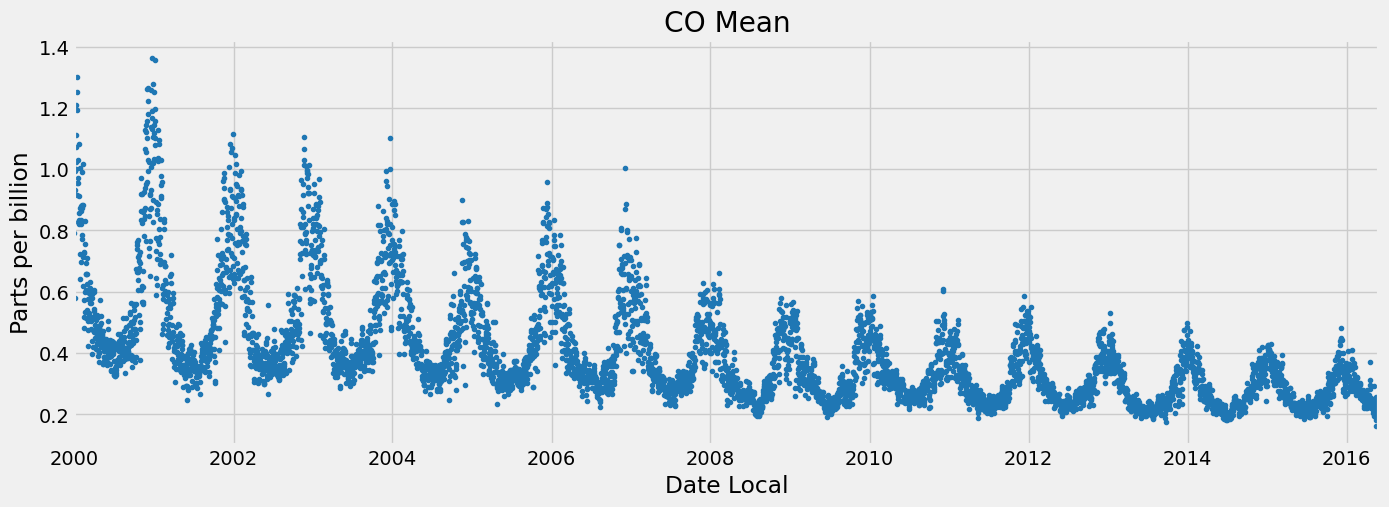

In [9]:
df_agg["CO Mean"].plot(style='.', 
                    figsize=(15,5), 
                    color="tab:blue", 
                    title="CO Mean")
plt.ylabel("Parts per billion")
plt.show()

# Train / Test Split

## O3

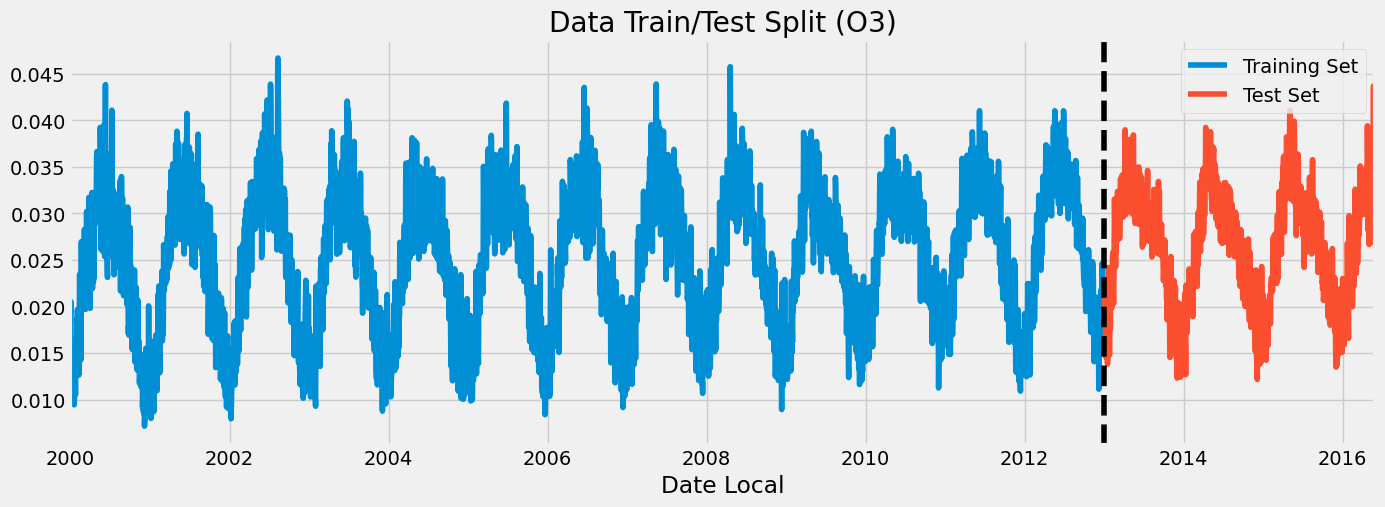

In [10]:
df_O3 = df_agg[['O3 Mean']]
train_O3 = df_O3.loc[df_O3.index < '2013-01-01']
test_O3 = df_O3.loc[df_O3.index >= '2013-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
train_O3.plot(ax=ax, label='Training Set', title='Data Train/Test Split (O3)')
test_O3.plot(ax=ax, label='Test Set')
ax.axvline('2013-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## CO

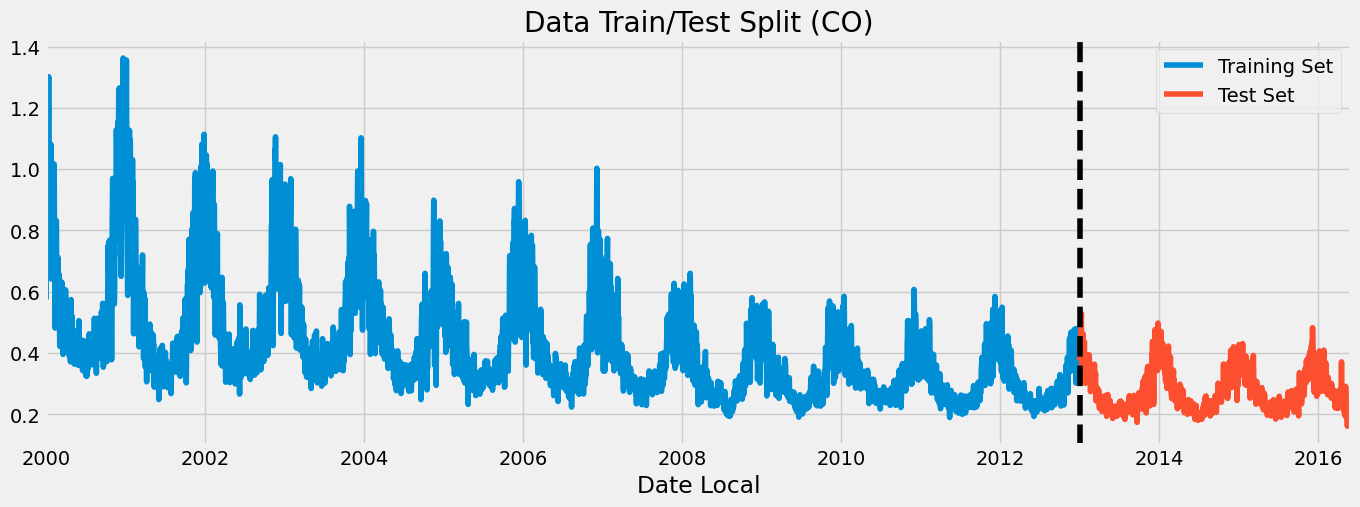

In [11]:
df_CO = df_agg[['CO Mean']]
train_CO = df_CO.loc[df_CO.index < '2013-01-01']
test_CO = df_CO.loc[df_CO.index >= '2013-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
train_CO.plot(ax=ax, label='Training Set', title='Data Train/Test Split (CO)')
test_CO.plot(ax=ax, label='Test Set')
ax.axvline('2013-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## SO2

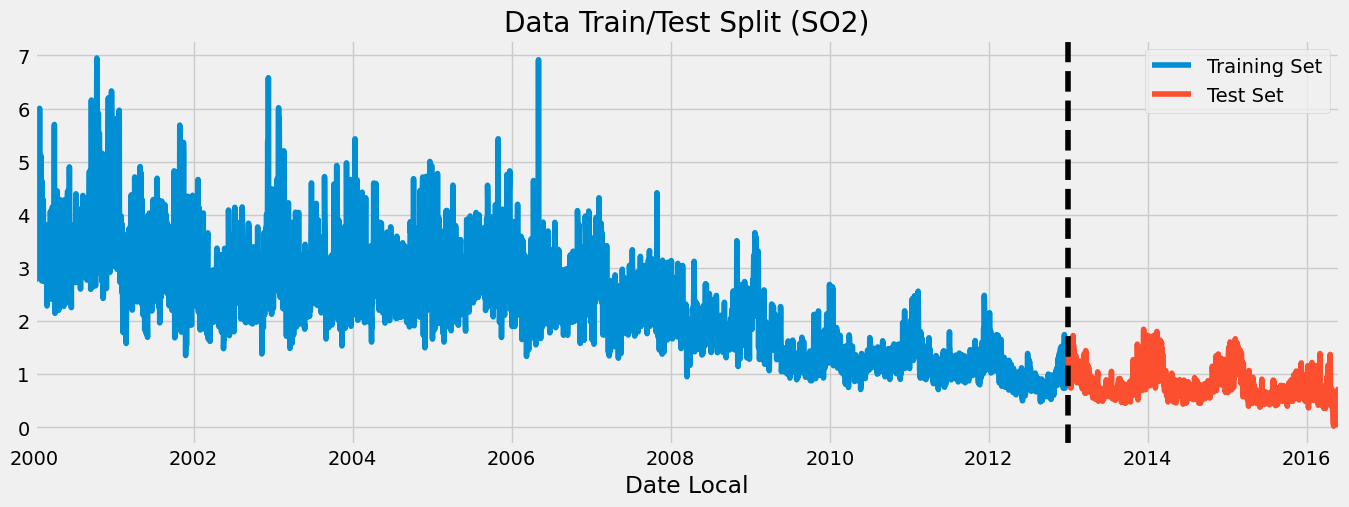

In [12]:
df_SO2 = df_agg[['SO2 Mean']]
train_SO2 = df_SO2.loc[df_SO2.index < '2013-01-01']
test_SO2 = df_SO2.loc[df_SO2.index >= '2013-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
train_SO2.plot(ax=ax, label='Training Set', title='Data Train/Test Split (SO2)')
test_SO2.plot(ax=ax, label='Test Set')
ax.axvline('2013-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## NO2

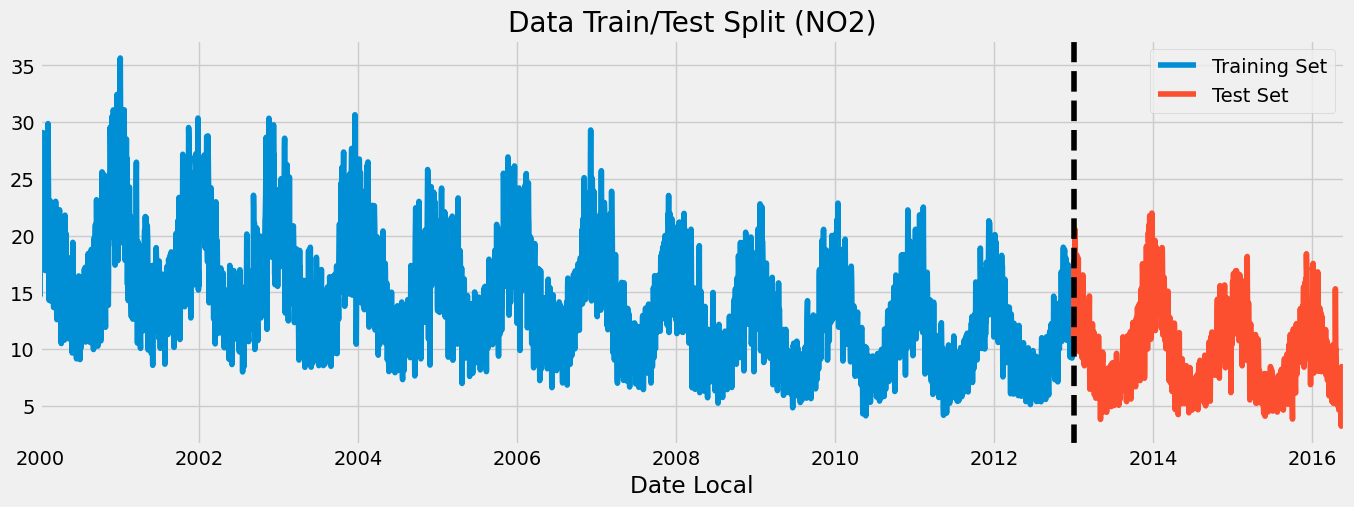

In [13]:
df_NO2 = df_agg[['NO2 Mean']]
train_NO2 = df_NO2.loc[df_NO2.index < '2013-01-01']
test_NO2 = df_NO2.loc[df_NO2.index >= '2013-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
train_NO2.plot(ax=ax, label='Training Set', title='Data Train/Test Split (NO2)')
test_NO2.plot(ax=ax, label='Test Set')
ax.axvline('2013-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

# Feature Creation

In [14]:
# Create time series features based on time series index.

def create_features(df):
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    return df


df_O3 = create_features(df_O3)
df_CO = create_features(df_CO)
df_NO2 = create_features(df_NO2)
df_SO2 = create_features(df_SO2)

# Visualize Feature / Target Relationship

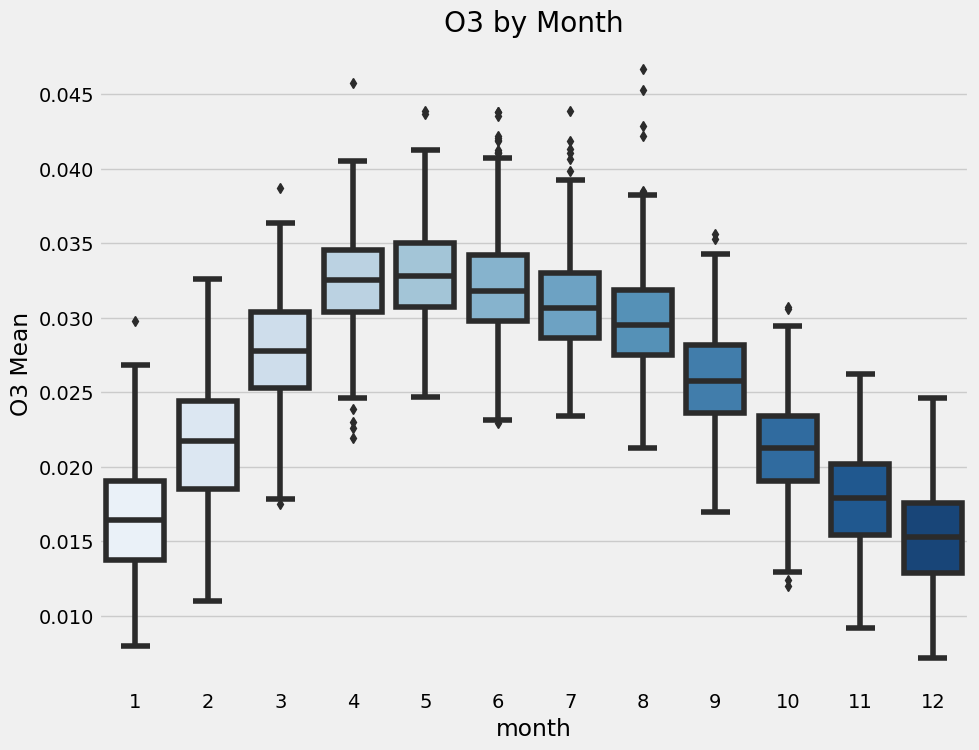

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_O3, x='month', y='O3 Mean', palette='Blues')
ax.set_title('O3 by Month')
plt.show()

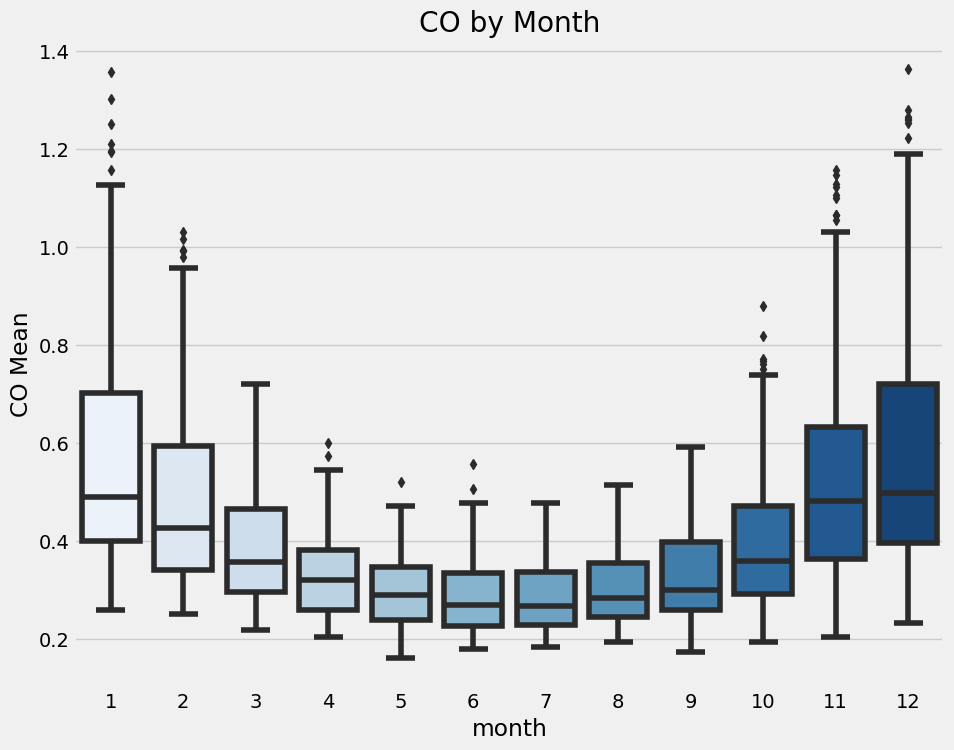

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_CO, x='month', y='CO Mean', palette='Blues')
ax.set_title('CO by Month')
plt.show()

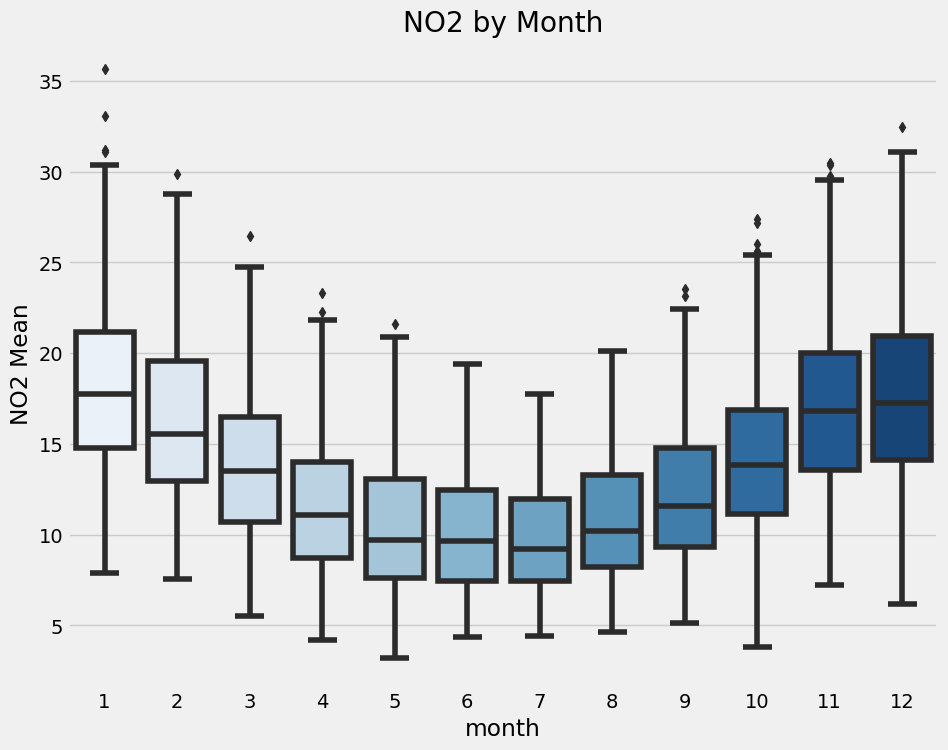

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_NO2, x='month', y='NO2 Mean', palette='Blues')
ax.set_title('NO2 by Month')
plt.show()

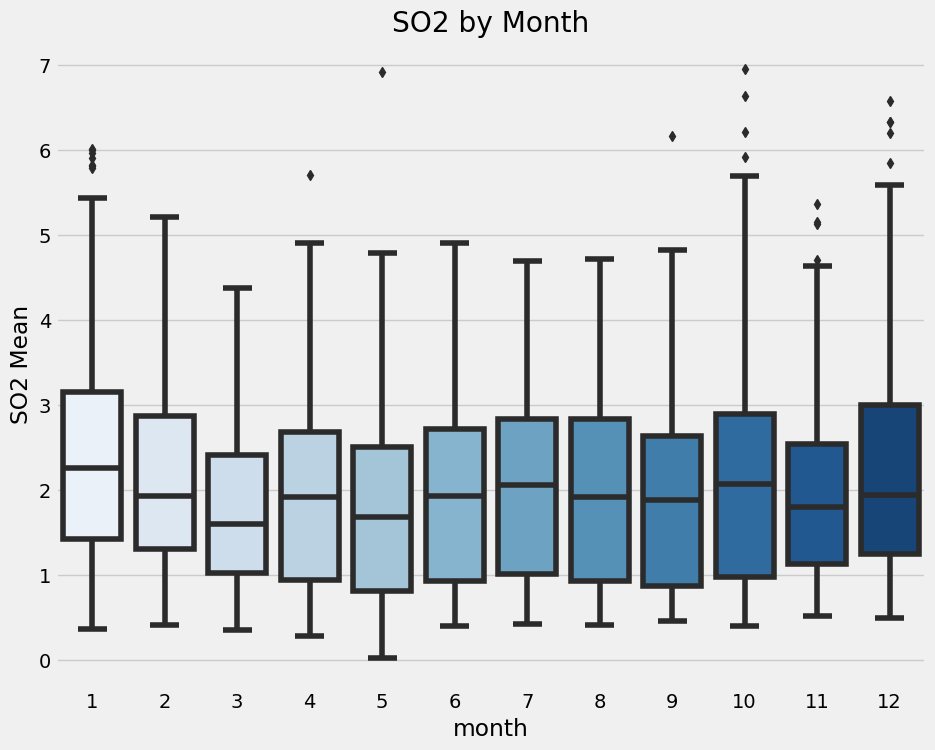

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_SO2, x='month', y='SO2 Mean', palette='Blues')
ax.set_title('SO2 by Month')
plt.show()

# Train Model

## O3

In [19]:
train_O3 = create_features(train_O3)
test_O3 = create_features(test_O3)

FEATURES = ['dayofyear', 'quarter', 'month', 'year', 'weekofyear']
TARGETO3 = 'O3 Mean'

X_train_O3 = train_O3[FEATURES]
y_train_O3 = train_O3[TARGETO3]

X_test_O3 = test_O3[FEATURES]
y_test_O3 = test_O3[TARGETO3]


regO3 = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)

# Fit the model
regO3.fit(X_train_O3, y_train_O3,
        eval_set=[(X_train_O3, y_train_O3), (X_test_O3, y_test_O3)],
        verbose=100)

[0]	validation_0-rmse:0.47025	validation_1-rmse:0.46870
[100]	validation_0-rmse:0.17227	validation_1-rmse:0.17072
[200]	validation_0-rmse:0.06319	validation_1-rmse:0.06165
[300]	validation_0-rmse:0.02335	validation_1-rmse:0.02238
[400]	validation_0-rmse:0.00904	validation_1-rmse:0.00855
[500]	validation_0-rmse:0.00435	validation_1-rmse:0.00416
[600]	validation_0-rmse:0.00319	validation_1-rmse:0.00313
[700]	validation_0-rmse:0.00298	validation_1-rmse:0.00292
[800]	validation_0-rmse:0.00293	validation_1-rmse:0.00291
[822]	validation_0-rmse:0.00293	validation_1-rmse:0.00292


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## CO

In [20]:
train_CO = create_features(train_CO)
test_CO = create_features(test_CO)

FEATURES = ['dayofyear', 'quarter', 'month', 'year', 'weekofyear']
TARGETCO = 'CO Mean'

X_train_CO = train_CO[FEATURES]
y_train_CO = train_CO[TARGETCO]

X_test_CO = test_CO[FEATURES]
y_test_CO = test_CO[TARGETCO]


regCO = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)

# Fit the model
regCO.fit(X_train_CO, y_train_CO,
        eval_set=[(X_train_CO, y_train_CO), (X_test_CO, y_test_CO)],
        verbose=100)

[0]	validation_0-rmse:0.19208	validation_1-rmse:0.22987
[100]	validation_0-rmse:0.10806	validation_1-rmse:0.12236
[200]	validation_0-rmse:0.08150	validation_1-rmse:0.08041
[300]	validation_0-rmse:0.07328	validation_1-rmse:0.06135
[400]	validation_0-rmse:0.07004	validation_1-rmse:0.05211
[500]	validation_0-rmse:0.06857	validation_1-rmse:0.04792
[600]	validation_0-rmse:0.06775	validation_1-rmse:0.04574
[700]	validation_0-rmse:0.06708	validation_1-rmse:0.04465
[800]	validation_0-rmse:0.06653	validation_1-rmse:0.04415
[900]	validation_0-rmse:0.06600	validation_1-rmse:0.04392
[999]	validation_0-rmse:0.06559	validation_1-rmse:0.04371


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## NO2

In [21]:
train_NO2 = create_features(train_NO2)
test_NO2 = create_features(test_NO2)

FEATURES = ['dayofyear', 'quarter', 'month', 'year', 'weekofyear']
TARGETNO2 = 'NO2 Mean'

X_train_NO2 = train_NO2[FEATURES]
y_train_NO2 = train_NO2[TARGETNO2]

X_test_NO2 = test_NO2[FEATURES]
y_test_NO2 = test_NO2[TARGETNO2]


regNO2 = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       # early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)

# Fit the model
regNO2.fit(X_train_NO2, y_train_NO2,
        eval_set=[(X_train_NO2, y_train_NO2), (X_test_NO2, y_test_NO2)],
        verbose=100)

[0]	validation_0-rmse:14.65441	validation_1-rmse:9.91258
[100]	validation_0-rmse:6.05128	validation_1-rmse:3.27536
[200]	validation_0-rmse:3.40189	validation_1-rmse:2.16398
[300]	validation_0-rmse:2.78596	validation_1-rmse:2.24144
[400]	validation_0-rmse:2.65457	validation_1-rmse:2.25854
[500]	validation_0-rmse:2.61603	validation_1-rmse:2.25329
[600]	validation_0-rmse:2.59577	validation_1-rmse:2.24446
[700]	validation_0-rmse:2.57950	validation_1-rmse:2.24070
[800]	validation_0-rmse:2.56603	validation_1-rmse:2.23719
[900]	validation_0-rmse:2.55556	validation_1-rmse:2.23465
[999]	validation_0-rmse:2.54700	validation_1-rmse:2.23267


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## SO2

In [22]:
train_SO2 = create_features(train_SO2)
test_SO2 = create_features(test_SO2)

FEATURES = ['dayofyear', 'quarter', 'month', 'year', 'weekofyear']
TARGETSO2 = 'SO2 Mean'

X_train_SO2 = train_SO2[FEATURES]
y_train_SO2 = train_SO2[TARGETSO2]

X_test_SO2 = test_SO2[FEATURES]
y_test_SO2 = test_SO2[TARGETSO2]


regSO2 = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       # early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)

# Fit the model
regSO2.fit(X_train_SO2, y_train_SO2,
        eval_set=[(X_train_SO2, y_train_SO2), (X_test_SO2, y_test_SO2)],
        verbose=100)

[0]	validation_0-rmse:2.04914	validation_1-rmse:0.40782
[100]	validation_0-rmse:0.91918	validation_1-rmse:0.27650
[200]	validation_0-rmse:0.61056	validation_1-rmse:0.31536
[300]	validation_0-rmse:0.54740	validation_1-rmse:0.31585
[400]	validation_0-rmse:0.53060	validation_1-rmse:0.32300
[500]	validation_0-rmse:0.52293	validation_1-rmse:0.32467
[600]	validation_0-rmse:0.51818	validation_1-rmse:0.32076
[700]	validation_0-rmse:0.51363	validation_1-rmse:0.31850
[800]	validation_0-rmse:0.50995	validation_1-rmse:0.31717
[900]	validation_0-rmse:0.50706	validation_1-rmse:0.31528
[999]	validation_0-rmse:0.50413	validation_1-rmse:0.31426


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Feature Importance

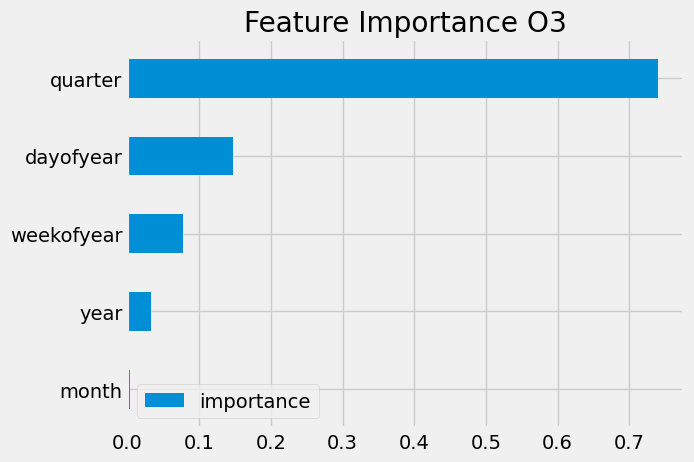

In [23]:
fiO3 = pd.DataFrame(data=regO3.feature_importances_,
             index=regO3.feature_names_in_,
             columns=['importance'])
fiO3.sort_values('importance').plot(kind='barh', title='Feature Importance O3')
plt.show()

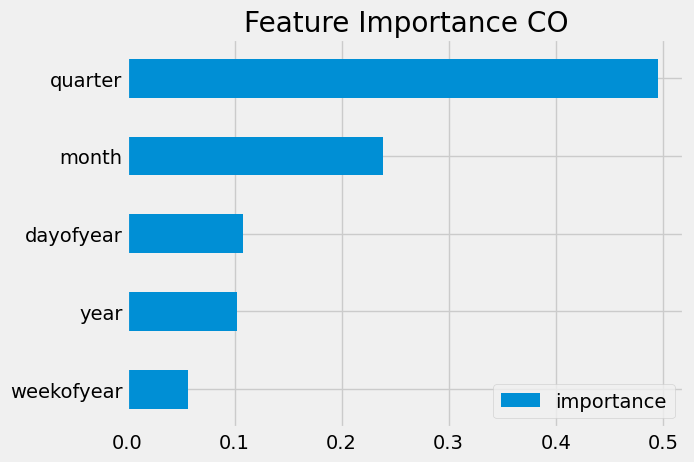

In [24]:
fiCO = pd.DataFrame(data=regCO.feature_importances_,
             index=regCO.feature_names_in_,
             columns=['importance'])
fiCO.sort_values('importance').plot(kind='barh', title='Feature Importance CO')
plt.show()

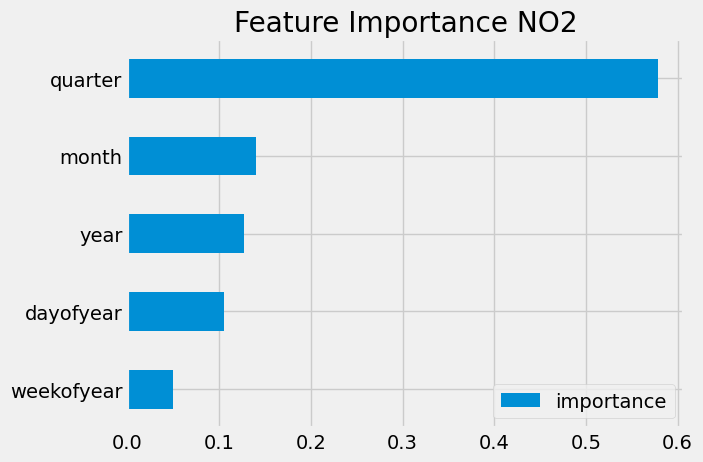

In [25]:
fiNO2 = pd.DataFrame(data=regNO2.feature_importances_,
             index=regNO2.feature_names_in_,
             columns=['importance'])
fiNO2.sort_values('importance').plot(kind='barh', title='Feature Importance NO2')
plt.show()

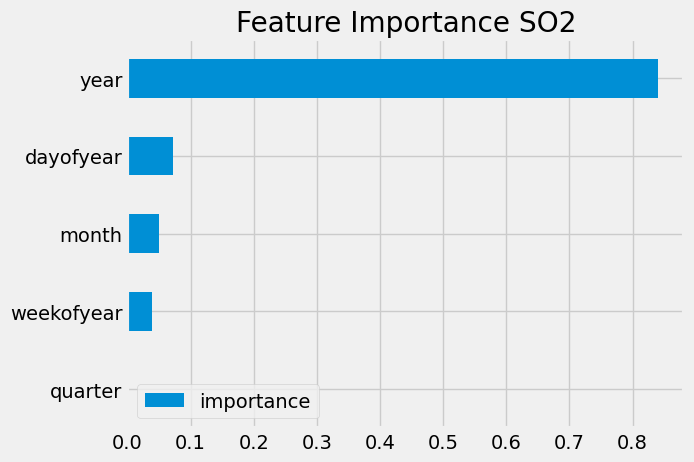

In [26]:
fiSO2 = pd.DataFrame(data=regSO2.feature_importances_,
             index=regSO2.feature_names_in_,
             columns=['importance'])
fiSO2.sort_values('importance').plot(kind='barh', title='Feature Importance SO2')
plt.show()

# Forecast on Test

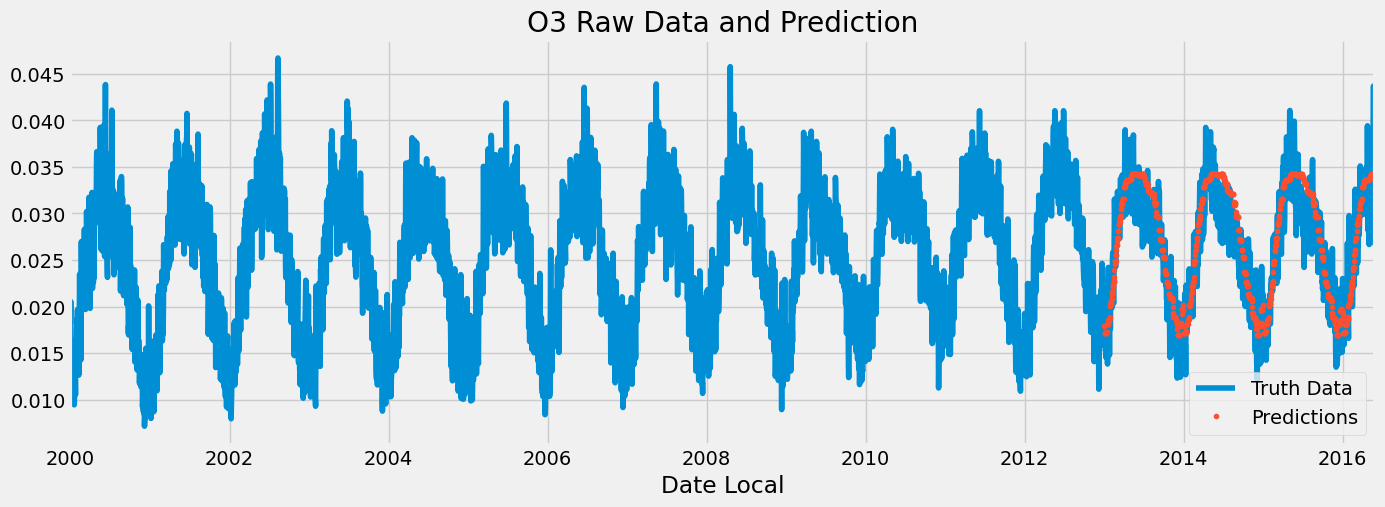

RMSE Score on Test set: 0.0029


In [27]:
test_O3['prediction'] = regO3.predict(X_test_O3)
df_O3 = df_O3.merge(test_O3[['prediction']], how='left', left_index=True, right_index=True)

# Plot the results
ax = df_O3[['O3 Mean']].plot(figsize=(15, 5))
df_O3['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('O3 Raw Data and Prediction')
plt.show()

score = np.sqrt(mean_squared_error(test_O3['O3 Mean'], test_O3['prediction']))
print(f'RMSE Score on Test set: {score:0.4f}')

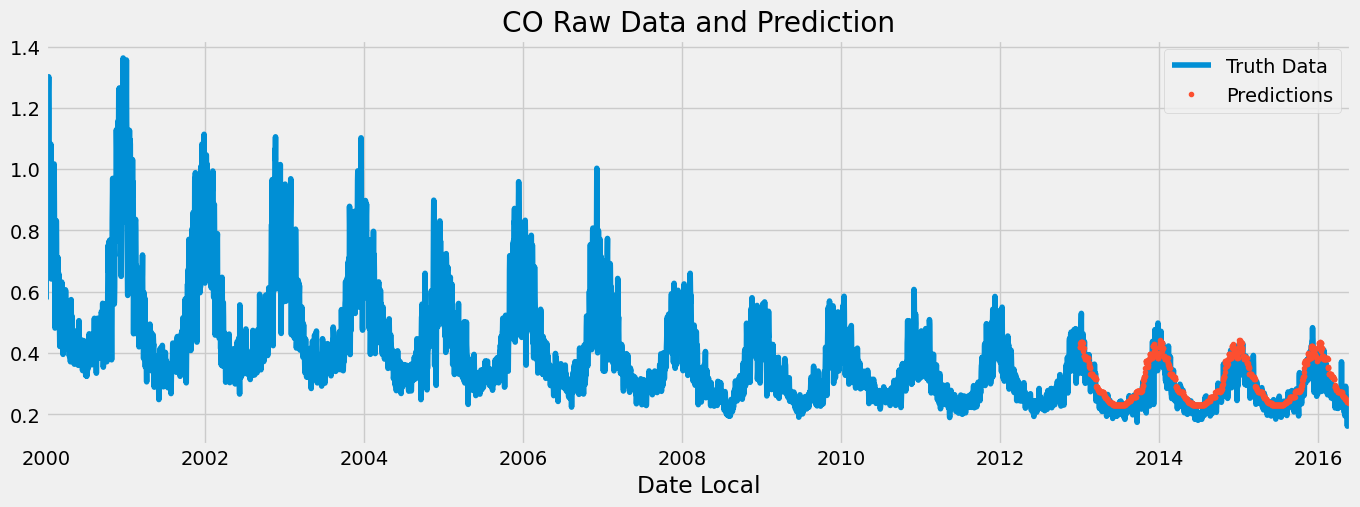

RMSE Score on Test set: 0.04


In [28]:
test_CO['prediction'] = regCO.predict(X_test_CO)
df_CO = df_CO.merge(test_CO[['prediction']], how='left', left_index=True, right_index=True)

# Plot the results
ax = df_CO[['CO Mean']].plot(figsize=(15, 5))
df_CO['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('CO Raw Data and Prediction')
plt.show()

score = np.sqrt(mean_squared_error(test_CO['CO Mean'], test_CO['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

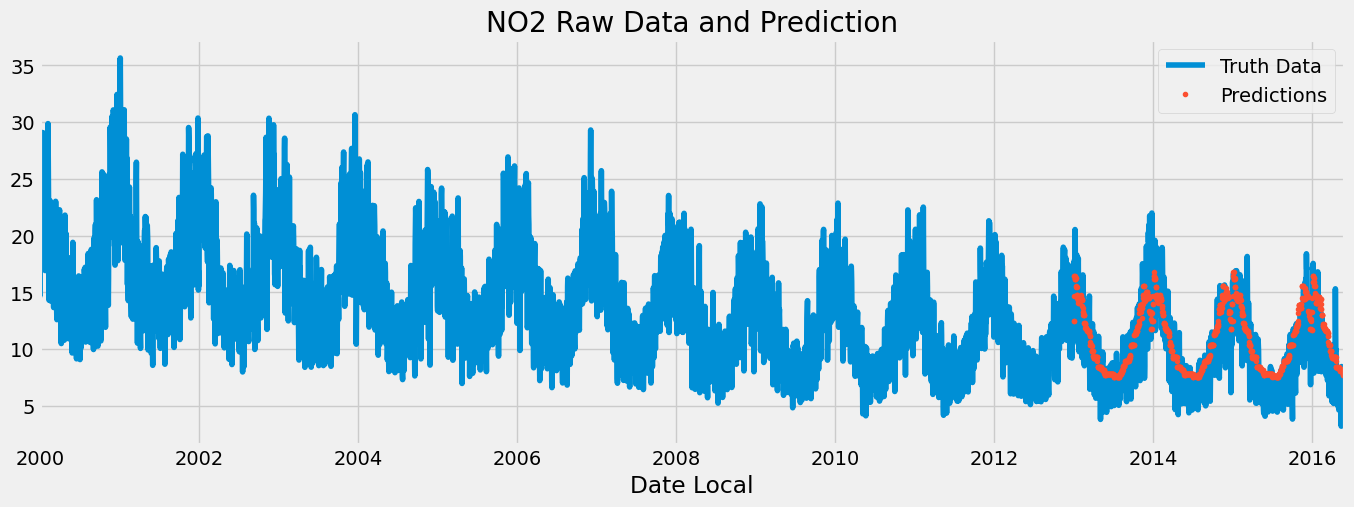

RMSE Score on Test set: 2.23


In [29]:
test_NO2['prediction'] = regNO2.predict(X_test_NO2)
df_NO2 = df_NO2.merge(test_NO2[['prediction']], how='left', left_index=True, right_index=True)

# Plot the results
ax = df_NO2[['NO2 Mean']].plot(figsize=(15, 5))
df_NO2['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('NO2 Raw Data and Prediction')
plt.show()

score = np.sqrt(mean_squared_error(test_NO2['NO2 Mean'], test_NO2['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

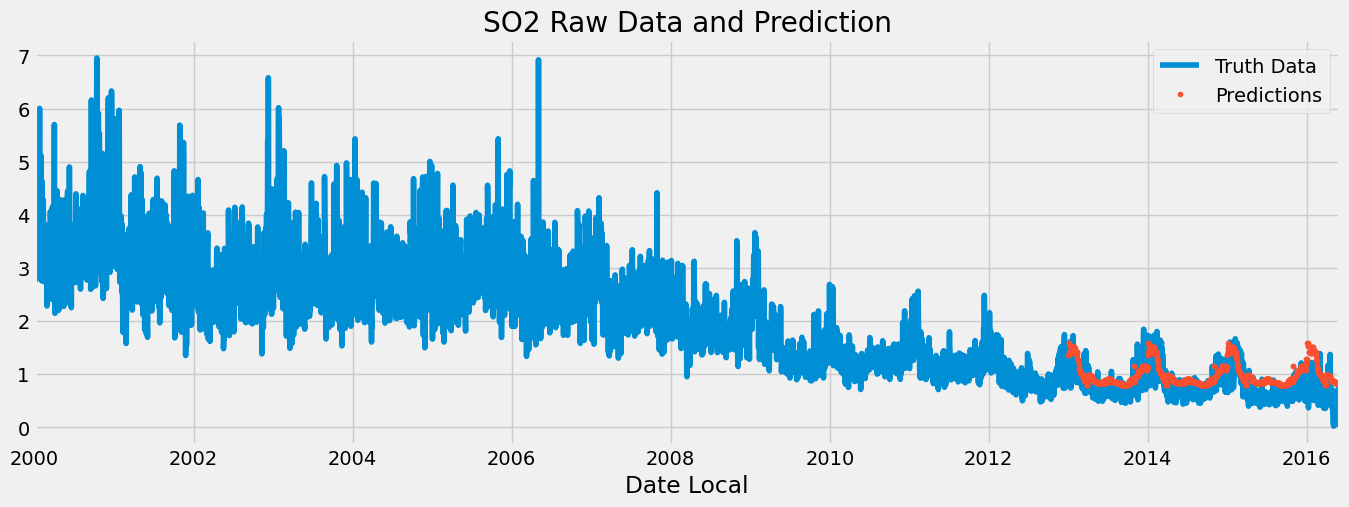

RMSE Score on Test set: 0.31


In [30]:
test_SO2['prediction'] = regSO2.predict(X_test_SO2)
df_SO2 = df_SO2.merge(test_SO2[['prediction']], how='left', left_index=True, right_index=True)

# Plot the results
ax = df_SO2[['SO2 Mean']].plot(figsize=(15, 5))
df_SO2['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('SO2 Raw Data and Prediction')
plt.show()

score = np.sqrt(mean_squared_error(test_SO2['SO2 Mean'], test_SO2['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

# Future

## O3

In [31]:
df_O3 = create_features(df_O3)

FEATURES = ['dayofyear', 'quarter', 'month', 'year', 'weekofyear']
TARGETO3 = 'O3 Mean'

X_all_O3 = df_O3[FEATURES]
y_all_O3 = df_O3[TARGETO3]


regO3all = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)

# Fit the model
regO3all.fit(X_all_O3, y_all_O3,
        eval_set=[(X_all_O3, y_all_O3)],
        verbose=100)

[0]	validation_0-rmse:0.46993
[100]	validation_0-rmse:0.17213
[200]	validation_0-rmse:0.06313
[300]	validation_0-rmse:0.02331
[400]	validation_0-rmse:0.00899
[500]	validation_0-rmse:0.00428
[600]	validation_0-rmse:0.00311
[700]	validation_0-rmse:0.00290
[800]	validation_0-rmse:0.00285
[900]	validation_0-rmse:0.00283
[999]	validation_0-rmse:0.00282


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
df_O3.index.max()

Timestamp('2016-05-31 00:00:00')

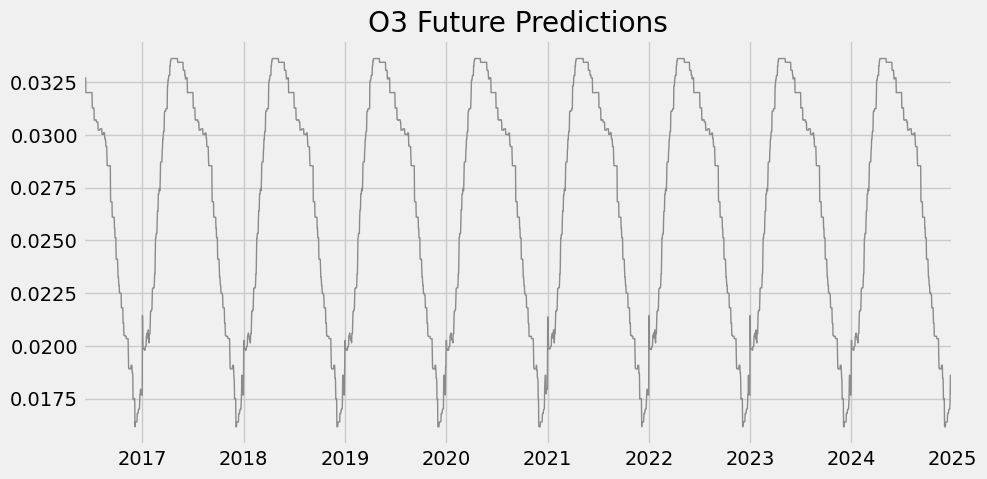

In [33]:
# Create future dataframe
future = pd.date_range('2016-05-31', '2025-01-01', freq='1d')
future_dfO3 = pd.DataFrame(index=future)
future_dfO3['isFuture'] = True
df_O3['isFuture'] = False
dfO3_and_future = pd.concat([df_O3,future_dfO3])
dfO3_and_future = create_features(dfO3_and_future)

#
O3future_w_features = dfO3_and_future.query('isFuture').copy()

#
O3future_w_features['pred'] = regO3all.predict(O3future_w_features[FEATURES])

#
O3future_w_features['pred'].plot(figsize=(10, 5),
                                color=color_pal[4],
                                ms=1,
                                lw=1,
                                title='O3 Future Predictions')
plt.show()

## CO

In [34]:
df_CO = create_features(df_CO)

FEATURES = ['dayofyear', 'quarter', 'month', 'year', 'weekofyear']
TARGETCO = 'CO Mean'

X_all_CO = df_CO[FEATURES]
y_all_CO = df_CO[TARGETCO]


regCOall = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)

# Fit the model
regCOall.fit(X_all_CO, y_all_CO,
        eval_set=[(X_all_CO, y_all_CO)],
        verbose=100)

[0]	validation_0-rmse:0.20043
[100]	validation_0-rmse:0.10665
[200]	validation_0-rmse:0.07693
[300]	validation_0-rmse:0.06782
[400]	validation_0-rmse:0.06465
[500]	validation_0-rmse:0.06328
[600]	validation_0-rmse:0.06239
[700]	validation_0-rmse:0.06188
[800]	validation_0-rmse:0.06156
[900]	validation_0-rmse:0.06118
[999]	validation_0-rmse:0.06084


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

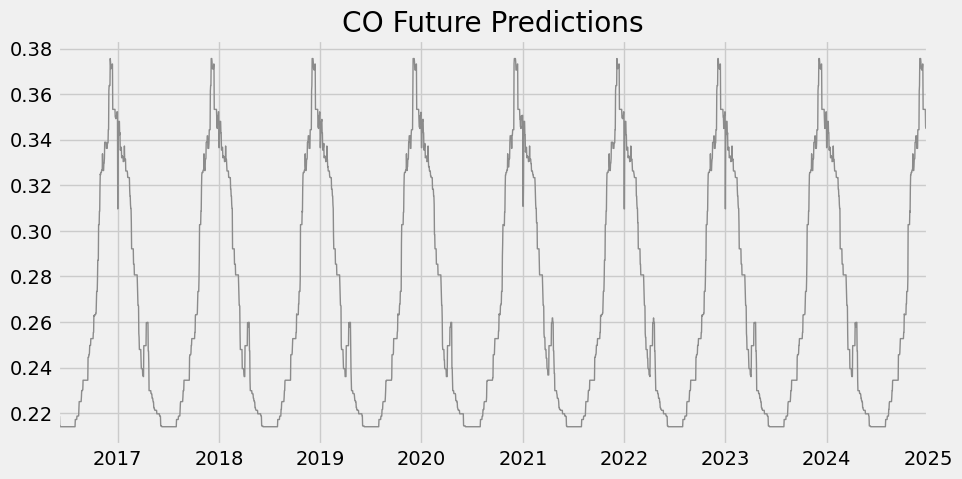

In [35]:
# Create future dataframe
future = pd.date_range('2016-05-31', '2025-01-01', freq='1d')
future_dfCO = pd.DataFrame(index=future)
future_dfCO['isFuture'] = True
df_CO['isFuture'] = False
dfCO_and_future = pd.concat([df_CO,future_dfCO])
dfCO_and_future = create_features(dfCO_and_future)

#
COfuture_w_features = dfCO_and_future.query('isFuture').copy()

#
COfuture_w_features['pred'] = regCOall.predict(COfuture_w_features[FEATURES])

#
COfuture_w_features['pred'].plot(figsize=(10, 5),
                                color=color_pal[4],
                                ms=1,
                                lw=1,
                                title='CO Future Predictions')
plt.show()

## NO2

In [36]:
df_NO2 = create_features(df_NO2)

FEATURES = ['dayofyear', 'quarter', 'month', 'year', 'weekofyear']
TARGETNO2 = 'NO2 Mean'

X_all_NO2 = df_NO2[FEATURES]
y_all_NO2 = df_NO2[TARGETNO2]


regNO2all = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=800,
                       # early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)

# Fit the model
regNO2all.fit(X_all_NO2, y_all_NO2,
        eval_set=[(X_all_NO2, y_all_NO2)],
        verbose=100)

[0]	validation_0-rmse:13.80623
[100]	validation_0-rmse:5.73890
[200]	validation_0-rmse:3.25428
[300]	validation_0-rmse:2.66011
[400]	validation_0-rmse:2.52767
[500]	validation_0-rmse:2.48736
[600]	validation_0-rmse:2.46891
[700]	validation_0-rmse:2.45611
[799]	validation_0-rmse:2.44411


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

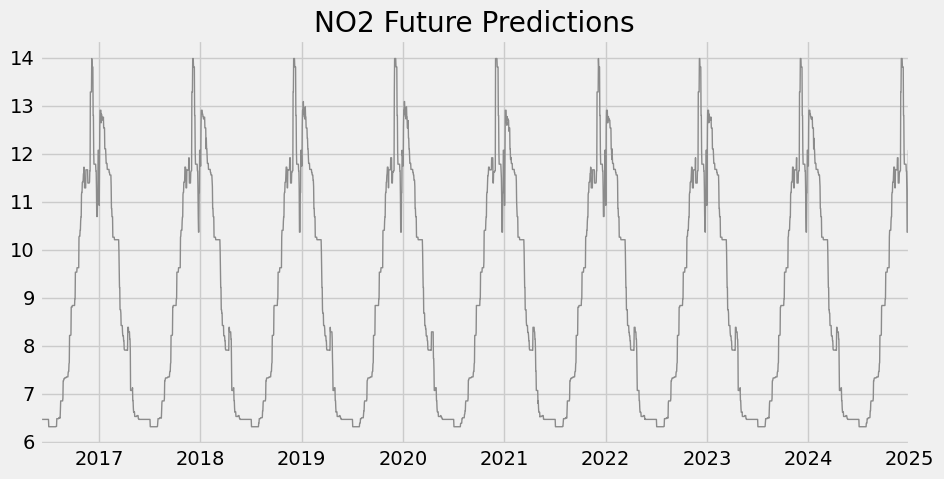

In [37]:
# Create future dataframe
future = pd.date_range('2016-05-31', '2025-01-01', freq='1d')
future_dfNO2 = pd.DataFrame(index=future)
future_dfNO2['isFuture'] = True
df_NO2['isFuture'] = False
dfNO2_and_future = pd.concat([df_NO2,future_dfNO2])
dfNO2_and_future = create_features(dfNO2_and_future)

#
NO2future_w_features = dfNO2_and_future.query('isFuture').copy()

#
NO2future_w_features['pred'] = regNO2all.predict(NO2future_w_features[FEATURES])

#
NO2future_w_features['pred'].plot(figsize=(10, 5),
                                color=color_pal[4],
                                ms=1,
                                lw=1,
                                title='NO2 Future Predictions')
plt.show()

## SO2

In [38]:
df_SO2 = create_features(df_SO2)

FEATURES = ['dayofyear', 'quarter', 'month', 'year', 'weekofyear']
TARGETSO2 = 'SO2 Mean'

X_all_SO2 = df_SO2[FEATURES]
y_all_SO2 = df_SO2[TARGETSO2]


regSO2all = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)

# Fit the model
regSO2all.fit(X_all_SO2, y_all_SO2,
        eval_set=[(X_all_SO2, y_all_SO2)],
        verbose=100)

[0]	validation_0-rmse:1.83328
[100]	validation_0-rmse:0.83073
[200]	validation_0-rmse:0.55748
[300]	validation_0-rmse:0.49942
[400]	validation_0-rmse:0.48441
[500]	validation_0-rmse:0.47723
[600]	validation_0-rmse:0.47278
[700]	validation_0-rmse:0.46899
[800]	validation_0-rmse:0.46567
[900]	validation_0-rmse:0.46307
[999]	validation_0-rmse:0.46065


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

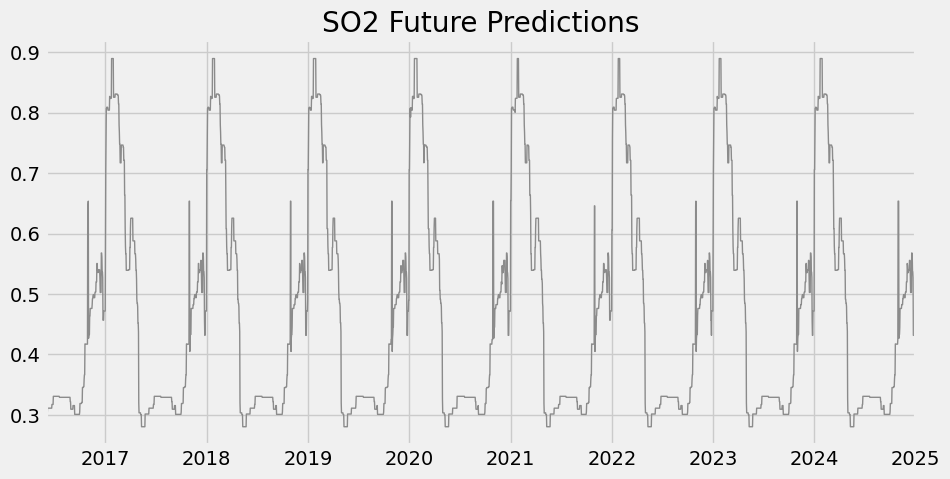

In [39]:
# Create future dataframe
future = pd.date_range('2016-05-31', '2025-01-01', freq='1d')
future_dfSO2 = pd.DataFrame(index=future)
future_dfSO2['isFuture'] = True
df_SO2['isFuture'] = False
dfSO2_and_future = pd.concat([df_SO2,future_dfSO2])
dfSO2_and_future = create_features(dfSO2_and_future)

#
SO2future_w_features = dfSO2_and_future.query('isFuture').copy()

#
SO2future_w_features['pred'] = regSO2all.predict(SO2future_w_features[FEATURES])

#
SO2future_w_features['pred'].plot(figsize=(10, 5),
                                color=color_pal[4],
                                ms=1,
                                lw=1,
                                title='SO2 Future Predictions')
plt.show()

# Save Models

In [40]:
regO3all.save_model("O3_model.json")
regCOall.save_model("CO_model.json")
regNO2all.save_model("NO2_model.json")
regSO2all.save_model("SO2_model.json")